# A very quick introduction to Automatic Differention and Gradient Descent

## Example: using Gradient Descent to solve a Linear Regression Problem

## Part of CE811, University of Essex, 2024

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk


## Build a scatter diagram

- First build some datapoints for a simple linear regression example...

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# dataset for a simple regression problem (1 input 1 output):
dataset_size=10
noise_level=1
np.random.seed(1) # Seed the random number generator so the whole class have consistent results
x_train=(np.random.rand(dataset_size,1)*5+2).astype(np.float32)
y_train=(3*x_train+1+np.random.normal(scale=noise_level, size=(dataset_size,1))).astype(np.float32)

In [2]:
print("x_train",x_train.shape, x_train)
print("y_train",y_train.shape, y_train)

x_train (10, 1) [[4.08511  ]
 [5.6016226]
 [2.000572 ]
 [3.511663 ]
 [2.7337794]
 [2.461693 ]
 [2.931301 ]
 [3.7278037]
 [3.9838374]
 [4.6940837]]
y_train (10, 1) [[15.000143 ]
 [17.04366  ]
 [ 7.3207545]
 [11.285618 ]
 [10.663445 ]
 [ 6.324939 ]
 [ 9.471486 ]
 [11.799356 ]
 [14.085281 ]
 [13.982359 ]]


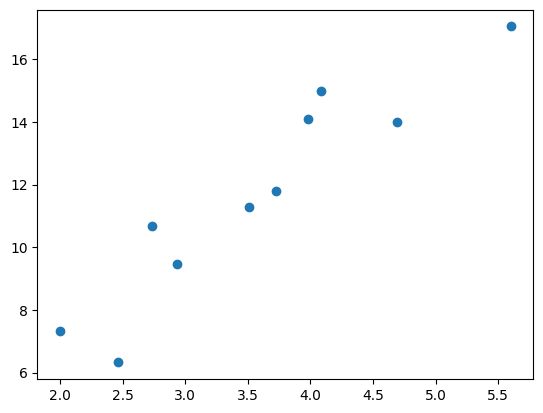

In [3]:
# show training set
plt.scatter(x_train, y_train)

## Build a linear regression model
- We will build a linear regression model $y=wx+b$ to try to fit the data.  
- We don't know what $w$ and $b$ are yet though.

In [4]:
import os
import tensorflow as tf
os.environ["KERAS_BACKEND"] = "tensorflow"

w=tf.Variable(0.0, tf.float32)
b=tf.Variable(0.0, tf.float32)

def model(x):
    return x*w+b
print(model(x_train))

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)


Let's show how our model depends upon $w$:

In [5]:
w.assign(0.1)
print(model(x_train))

tf.Tensor(
[[0.408511  ]
 [0.56016225]
 [0.2000572 ]
 [0.3511663 ]
 [0.27337795]
 [0.24616931]
 [0.29313013]
 [0.37278038]
 [0.39838374]
 [0.46940836]], shape=(10, 1), dtype=float32)


- In the cell below, try to print what the model outputs given input x=0.65.
    - **Try This** (Check: we should get 0.065)
    
- Remember in Jupyter Notebooks you can use "menu:cell:run cells" to run the currently highlighted cells.
        - the same can be achieved with ctrl+Enter
    - Also in Jupyter, in some notebooks you might need to "Menu:Cell:run all" to refresh all variables in the correct order
        - or even use "Kernel: Restart and run all"

In [9]:
# TODO put some code here
print(model(tf.constant(0.65)).numpy())

0.065


- **Try This**: Change b to 0.2 and evaluate the model given input x=0.65

In [13]:
b = tf.Variable(0.2, dtype=tf.float32)
def model(x):
    return x * w + b
x = tf.constant(0.65, dtype=tf.float32)
y = model(x)
print(y.numpy())

0.265


### Define a "loss function" 
- To apply gradient descent, we need to define a loss function.
- This loss function calculates how well the model is doing
- We will manually encode the mean-squared error

In [14]:
def loss_function(x,y):
    return tf.reduce_mean(tf.square(model(x)-y))
print(loss_function(x_train, y_train))

tf.Tensor(133.95712, shape=(), dtype=float32)


- **Try this:**
    - In the cell below, evaluate the loss function when x=1 and the output is supposedly 4.
    - Compare this to the actual model output when x=1

In [15]:
# TODO put some code here
x = tf.constant(1.0, dtype=tf.float32)
y_true = tf.constant(4.0, dtype=tf.float32)
y_pred = model(x)
loss_value = loss_function(x, y_true)
print("Model output when x=1:", y_pred.numpy())
print("Loss value when expected output is 4:", loss_value.numpy())

Model output when x=1: 0.3
Loss value when expected output is 4: 13.690001


### Use Automatic Differentiation

- Automatic differention is one of the amazing things about tensorflow, which allows Keras to build and train neural networks very easily.  
- It uses "backpropagation" to compute the necessary gradients.
- Here we'll use it to compute the gradient of the loss function with respect to $w$ and $b$

In [16]:
with tf.GradientTape() as tape:

    # Run the forward pass of the layer.
    # The operations that the layer applies
    # to its inputs are going to be recorded
    # on the GradientTape.
    L=loss_function(x_train, y_train)
print("L",L.numpy())
grads = tape.gradient(L, [w,b])
print("w,b",w.numpy(),b.numpy())
print("dL/dw",grads[0].numpy())
print("dL/db",grads[1].numpy())


L 133.95712
w,b 0.1 0.2
dL/dw -85.65322
dL/db -22.28078


### Apply an iteration of "gradient descent"
If we aim to improve $L$ a tiny bit then we can use the following two updates:
- $w \leftarrow w-\eta \frac{\partial L}{\partial w}$
- $b \leftarrow b-\eta \frac{\partial L}{\partial b}$

where $\eta>0$ is any small number we choose.

This is what is meant by "gradient descent".

In [17]:
eta=0.001
w.assign(w-eta*grads[0])
b.assign(b-eta*grads[1])
print("w,b",w.numpy(),b.numpy())
L=loss_function(x_train, y_train)
print("L",L.numpy())

w,b 0.18565322 0.22228079
L 126.23982


### Iteratively apply gradient descent

- Run the code block below serveral times and see what $w$ and $b$ converge to.  
    - In Jupyter, Click ctrl+enter to run a block.
- **Extra Challenge:** Try to wrap the code block below into a python "for loop" to run 10000 times.

In [18]:
with tf.GradientTape() as tape:
    L=loss_function(x_train, y_train)
grads = tape.gradient(L, [w,b])

eta=0.001
w.assign(w-eta*grads[0])
b.assign(b-eta*grads[1])
print("w,b",w.numpy(),b.numpy())
new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
print("new_L",new_L.numpy(),". Old L",L.numpy())

w,b 0.26877758 0.2439049
new_L 118.97146 . Old L 126.23982


###  Use a built-in optimizer

- Instead of hand coding the updates for $w$ and $b$, we can use a built-in optimiser.
- For ordinary gradient descent we use "SGD" optimizer.


In [19]:
import tensorflow.keras as keras
w_history=[] # keep a history for plotting purposes
b_history=[]
L_history=[]
w.assign(0) # We'll restart from scratch in this script
b.assign(0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

In [20]:
eta=0.001
optimizer=keras.optimizers.SGD(eta)
for i in range(1000):
    with tf.GradientTape() as tape:
        L=loss_function(x_train, y_train)
        
    grads = tape.gradient(L, [w,b])
    optimizer.apply_gradients(zip(grads, [w,b])) # This line updates w and b with 1 step of gradient descent
    
    w_history.append(w.numpy()) # append to history for plotting purposes
    b_history.append(b.numpy())
    L_history.append(L.numpy())
print("w,b",w.numpy(),b.numpy())
new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
print("new_L",new_L.numpy(),". Old L",L.numpy())

w,b 3.0293849 0.84698844
new_L 1.2968557 . Old L 1.2968585


### Compare to optimal values for linear regression

In [21]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train.reshape(-1),y_train.reshape(-1))
print("slope",slope)
print("intercept",intercept)

slope 2.934823559043344
intercept 1.2111488477281185


Plot the history graphs to see how well the variables converged.

Text(0.5, 1.0, 'b history')

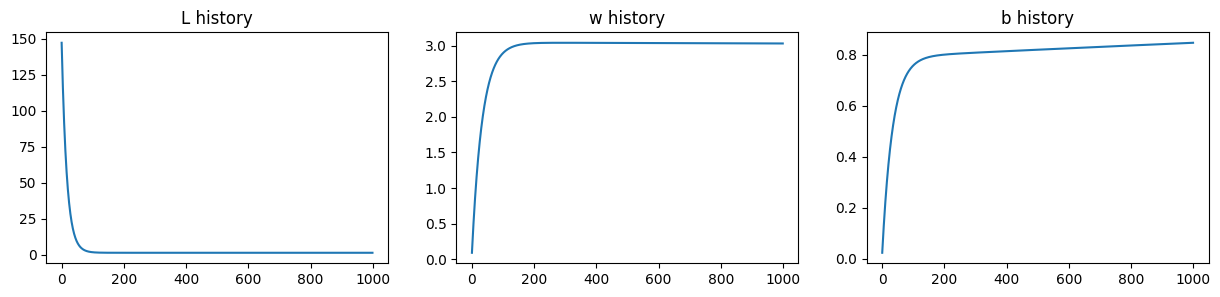

In [22]:
fig=plt.figure(figsize=[15, 3])
ax1=fig.add_subplot(1,3, 1)
ax1.plot(L_history)
ax1.set_title("L history")              
ax2=fig.add_subplot(1,3, 2)
ax2.plot(w_history)
ax2.set_title("w history")              
ax3=fig.add_subplot(1,3, 3)
ax3.plot(b_history)
ax3.set_title("b history")              

**Exercise:**

1. Rerun the gradient descent iterations until the model's $w$ and $b$ parameters match the actual slope and intercept values calculated by stats.linregress
2. Increase / decrease the learning rate as you see fit.  

**Questions:**
1. What happens if eta is too large?  **TODO:** Write answer here
2. What happens if eta is too small?  **TODO:** Write answer here

## Using a Keras "model" to hold $w$ and $b$
Instead of building our own linear model $y=wx+b$ as above, we can use the in-built keras "Dense" layer

- We will use a keras "Dense" layer with 1 input and 1 output.
- This keras dense layer represents a model $y=wx+b$, where $w$ and $b$ are learnable variables.  
    - $w$ is called the "kernel", and $b$ is called the "bias"
    - Note that $w$ is a 1*1 matrix, and $b$ is a length-1 vector.

In [23]:
from tensorflow.keras import layers

class LinearModel(keras.Model):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.layer1=layers.Dense(1)
    def call(self, x):
        return self.layer1(x)
    
keras_linear_model=LinearModel()
keras_linear_model(x_train)
print("This is the w value",keras_linear_model.layer1.kernel.numpy())
print("This is the b value",keras_linear_model.layer1.bias.numpy())


This is the w value [[0.2291795]]
This is the b value [0.]


## Use Keras "fit" for the training loop
- Keras allows us to quickly define the optimizer to use (SGD), and the loss function to use
- It also provides a "fit" function which executes the training loop.

Run and study the following code.

In [ ]:
keras_linear_model.compile(
    optimizer=keras.optimizers.SGD(0.01),  # Optimizer
    loss=keras.losses.MeanSquaredError()
)
history = keras_linear_model.fit(
    x_train,
    y_train,
    batch_size=len(x_train),
    epochs=5000, # TODO increase this if necessary
    verbose=1 # TODO: switch verbose=0 to make it not print any epoch summaries, and therefore run a bit faster
)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 127.4348
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63.9563
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.4250
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.7625
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9826
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1181
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1984
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2449
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7712
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5359
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4190
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3609
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3320
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3176
Epoch 15/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3105
Epoch

In [25]:
print("w",keras_linear_model.layer1.kernel.numpy(),"Optimal w:",slope)
print("b",keras_linear_model.layer1.bias.numpy(),"Optimal b:",intercept)


w [[2.9349139]] Optimal w: 2.934823559043344
b [1.2108011] Optimal b: 1.2111488477281185


## Summary

- We have built this simple model:
<img src="./images/ffnn_single_layer.svg" alt="1-layer FFNN" width="300">
- We've been introduced to Automatic Differntiation, and gradient descent.
- We've also seen the keras Dense layer, the Keras loss functions, optimizer and fit loop

- We'll study these more in the next workbook...